In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# input file path
workdir = "E://Ronny_TF//200914_reupload//Dataset//Scenario8_individual_model_approach"

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1214879918551979843
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8267812044
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11794770168237818132
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

In [3]:
# hyperparameters of CNN
num_classes = 1
learning_rate = 0.0002
training_epochs = 40
batch_size = 50
# img_rows, img_cols = 154, 154


W0918 16:59:50.677824 15016 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:514: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0918 16:59:50.679775 15016 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:71: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0918 16:59:50.680752 15016 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:4076: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0918 16:59:50.698320 15016 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:3900: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



AEW541_//n
train_X shape: (303, 21213, 1)
303 train samples
75 test samples
StartTime : 2020-09-18 16:59:50.677825


W0918 16:59:50.734432 15016 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:130: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0918 16:59:50.742240 15016 deprecation.py:506] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:3363: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0918 16:59:50.879883 15016 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\optimizers.py:757: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



StartTime : 2020-09-18 16:59:50.896448


W0918 16:59:51.165824 15016 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:983: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 303 samples, validate on 75 samples
Epoch 1/40
303/303 [==============================] - 2s 7ms/step - loss: 3.0475 - mean_squared_error: 3.0475 - mean_absolute_error: 1.6557 - val_loss: 2.8869 - val_mean_squared_error: 2.8869 - val_mean_absolute_error: 1.5870
Epoch 2/40
303/303 [==============================] - 0s 470us/step - loss: 2.8580 - mean_squared_error: 2.8580 - mean_absolute_error: 1.6005 - val_loss: 2.6049 - val_mean_squared_error: 2.6049 - val_mean_absolute_error: 1.4999
Epoch 3/40
303/303 [==============================] - 0s 470us/step - loss: 2.4595 - mean_squared_error: 2.4595 - mean_absolute_error: 1.4779 - val_loss: 2.0050 - val_mean_squared_error: 2.0050 - val_mean_absolute_error: 1.2915
Epoch 4/40
303/303 [==============================] - 0s 464us/step - loss: 1.6793 - mean_squared_error: 1.6793 - mean_absolute_error: 1.1952 - val_loss: 1.3019 - val_mean_squared_error: 1.3019 - val_mean_absolute_error: 0.9661
Epoch 5/40
303/303 [=========================

Epoch 37/40
303/303 [==============================] - 0s 506us/step - loss: 0.5789 - mean_squared_error: 0.5789 - mean_absolute_error: 0.5406 - val_loss: 1.1580 - val_mean_squared_error: 1.1580 - val_mean_absolute_error: 0.7195
Epoch 38/40
303/303 [==============================] - 0s 509us/step - loss: 0.5789 - mean_squared_error: 0.5789 - mean_absolute_error: 0.5607 - val_loss: 1.1110 - val_mean_squared_error: 1.1110 - val_mean_absolute_error: 0.7684
Epoch 39/40
303/303 [==============================] - 0s 474us/step - loss: 0.5754 - mean_squared_error: 0.5754 - mean_absolute_error: 0.6043 - val_loss: 1.1229 - val_mean_squared_error: 1.1229 - val_mean_absolute_error: 0.7430
Epoch 40/40
303/303 [==============================] - 0s 483us/step - loss: 0.5630 - mean_squared_error: 0.5630 - mean_absolute_error: 0.5559 - val_loss: 1.1798 - val_mean_squared_error: 1.1798 - val_mean_absolute_error: 0.7077
EndTime : 2020-09-18 16:59:59.205817
AEW541’s final rmse value is = 1.086172
AEW541 

248/248 [==============================] - 0s 457us/step - loss: 1.3911 - mean_squared_error: 1.3911 - mean_absolute_error: 0.6383 - val_loss: 0.3472 - val_mean_squared_error: 0.3472 - val_mean_absolute_error: 0.3560
Epoch 32/40
248/248 [==============================] - 0s 457us/step - loss: 1.3051 - mean_squared_error: 1.3051 - mean_absolute_error: 0.5920 - val_loss: 0.4078 - val_mean_squared_error: 0.4078 - val_mean_absolute_error: 0.4491
Epoch 33/40
248/248 [==============================] - 0s 464us/step - loss: 1.2677 - mean_squared_error: 1.2677 - mean_absolute_error: 0.6190 - val_loss: 0.3857 - val_mean_squared_error: 0.3857 - val_mean_absolute_error: 0.4153
Epoch 34/40
248/248 [==============================] - 0s 460us/step - loss: 1.2961 - mean_squared_error: 1.2961 - mean_absolute_error: 0.6496 - val_loss: 0.3734 - val_mean_squared_error: 0.3734 - val_mean_absolute_error: 0.3983
Epoch 35/40
248/248 [==============================] - 0s 472us/step - loss: 1.3004 - mean_squar

302/302 [==============================] - 0s 465us/step - loss: 2.3694 - mean_squared_error: 2.3694 - mean_absolute_error: 1.2034 - val_loss: 1.9244 - val_mean_squared_error: 1.9244 - val_mean_absolute_error: 1.1029
Epoch 26/40
302/302 [==============================] - 0s 469us/step - loss: 2.4250 - mean_squared_error: 2.4250 - mean_absolute_error: 1.2122 - val_loss: 1.8400 - val_mean_squared_error: 1.8400 - val_mean_absolute_error: 1.0719
Epoch 27/40
302/302 [==============================] - 0s 478us/step - loss: 2.3374 - mean_squared_error: 2.3374 - mean_absolute_error: 1.1772 - val_loss: 1.8223 - val_mean_squared_error: 1.8223 - val_mean_absolute_error: 1.0649
Epoch 28/40
302/302 [==============================] - 0s 485us/step - loss: 2.4714 - mean_squared_error: 2.4714 - mean_absolute_error: 1.2375 - val_loss: 1.9085 - val_mean_squared_error: 1.9085 - val_mean_absolute_error: 1.0926
Epoch 29/40
302/302 [==============================] - 0s 462us/step - loss: 2.3181 - mean_squar

302/302 [==============================] - 0s 472us/step - loss: 0.3450 - mean_squared_error: 0.3450 - mean_absolute_error: 0.3997 - val_loss: 0.5452 - val_mean_squared_error: 0.5452 - val_mean_absolute_error: 0.3359
Epoch 20/40
302/302 [==============================] - 0s 478us/step - loss: 0.3725 - mean_squared_error: 0.3725 - mean_absolute_error: 0.4054 - val_loss: 0.5459 - val_mean_squared_error: 0.5459 - val_mean_absolute_error: 0.2489
Epoch 21/40
302/302 [==============================] - 0s 482us/step - loss: 0.3820 - mean_squared_error: 0.3820 - mean_absolute_error: 0.4059 - val_loss: 0.5470 - val_mean_squared_error: 0.5470 - val_mean_absolute_error: 0.2379
Epoch 22/40
302/302 [==============================] - 0s 488us/step - loss: 0.3564 - mean_squared_error: 0.3564 - mean_absolute_error: 0.3815 - val_loss: 0.5496 - val_mean_squared_error: 0.5496 - val_mean_absolute_error: 0.2271
Epoch 23/40
302/302 [==============================] - 0s 475us/step - loss: 0.3903 - mean_squar

303/303 [==============================] - 0s 486us/step - loss: 0.7711 - mean_squared_error: 0.7711 - mean_absolute_error: 0.6166 - val_loss: 0.5597 - val_mean_squared_error: 0.5597 - val_mean_absolute_error: 0.4463
Epoch 14/40
303/303 [==============================] - 0s 499us/step - loss: 0.8368 - mean_squared_error: 0.8368 - mean_absolute_error: 0.6095 - val_loss: 0.5395 - val_mean_squared_error: 0.5395 - val_mean_absolute_error: 0.4760
Epoch 15/40
303/303 [==============================] - 0s 525us/step - loss: 0.7759 - mean_squared_error: 0.7759 - mean_absolute_error: 0.6293 - val_loss: 0.5512 - val_mean_squared_error: 0.5512 - val_mean_absolute_error: 0.5591
Epoch 16/40
303/303 [==============================] - 0s 506us/step - loss: 0.8574 - mean_squared_error: 0.8574 - mean_absolute_error: 0.6639 - val_loss: 0.5334 - val_mean_squared_error: 0.5334 - val_mean_absolute_error: 0.4773
Epoch 17/40
303/303 [==============================] - 0s 474us/step - loss: 0.7911 - mean_squar

303/303 [==============================] - 0s 490us/step - loss: 0.8726 - mean_squared_error: 0.8726 - mean_absolute_error: 0.7314 - val_loss: 0.3800 - val_mean_squared_error: 0.3800 - val_mean_absolute_error: 0.5325
Epoch 8/40
303/303 [==============================] - 0s 490us/step - loss: 0.8311 - mean_squared_error: 0.8311 - mean_absolute_error: 0.6926 - val_loss: 0.2361 - val_mean_squared_error: 0.2361 - val_mean_absolute_error: 0.4367
Epoch 9/40
303/303 [==============================] - 0s 477us/step - loss: 0.7558 - mean_squared_error: 0.7558 - mean_absolute_error: 0.6399 - val_loss: 0.1707 - val_mean_squared_error: 0.1707 - val_mean_absolute_error: 0.3676
Epoch 10/40
303/303 [==============================] - 0s 474us/step - loss: 0.6404 - mean_squared_error: 0.6404 - mean_absolute_error: 0.5534 - val_loss: 0.1417 - val_mean_squared_error: 0.1417 - val_mean_absolute_error: 0.3287
Epoch 11/40
303/303 [==============================] - 0s 470us/step - loss: 0.5997 - mean_squared

303/303 [==============================] - 1s 4ms/step - loss: 3.3952 - mean_squared_error: 3.3952 - mean_absolute_error: 1.7486 - val_loss: 3.4259 - val_mean_squared_error: 3.4259 - val_mean_absolute_error: 1.7936
Epoch 2/40
303/303 [==============================] - 0s 522us/step - loss: 3.1146 - mean_squared_error: 3.1146 - mean_absolute_error: 1.6678 - val_loss: 3.0130 - val_mean_squared_error: 3.0130 - val_mean_absolute_error: 1.6796
Epoch 3/40
303/303 [==============================] - 0s 490us/step - loss: 2.5044 - mean_squared_error: 2.5044 - mean_absolute_error: 1.4822 - val_loss: 2.1690 - val_mean_squared_error: 2.1690 - val_mean_absolute_error: 1.3934
Epoch 4/40
303/303 [==============================] - 0s 483us/step - loss: 1.4889 - mean_squared_error: 1.4889 - mean_absolute_error: 1.0832 - val_loss: 1.2898 - val_mean_squared_error: 1.2898 - val_mean_absolute_error: 0.9204
Epoch 5/40
303/303 [==============================] - 0s 480us/step - loss: 1.2761 - mean_squared_err

Epoch 37/40
303/303 [==============================] - 0s 474us/step - loss: 0.5243 - mean_squared_error: 0.5243 - mean_absolute_error: 0.5149 - val_loss: 0.9679 - val_mean_squared_error: 0.9679 - val_mean_absolute_error: 0.6082
Epoch 38/40
303/303 [==============================] - 0s 490us/step - loss: 0.5578 - mean_squared_error: 0.5578 - mean_absolute_error: 0.5415 - val_loss: 0.9726 - val_mean_squared_error: 0.9726 - val_mean_absolute_error: 0.5967
Epoch 39/40
303/303 [==============================] - 0s 470us/step - loss: 0.5194 - mean_squared_error: 0.5194 - mean_absolute_error: 0.5029 - val_loss: 0.9625 - val_mean_squared_error: 0.9625 - val_mean_absolute_error: 0.6324
Epoch 40/40
303/303 [==============================] - 0s 483us/step - loss: 0.5180 - mean_squared_error: 0.5180 - mean_absolute_error: 0.5247 - val_loss: 0.9727 - val_mean_squared_error: 0.9727 - val_mean_absolute_error: 0.6002
EndTime : 2020-09-18 17:00:45.528316
AZD0530’s final rmse value is = 0.986278
AZD053

303/303 [==============================] - 0s 474us/step - loss: 0.7100 - mean_squared_error: 0.7100 - mean_absolute_error: 0.5634 - val_loss: 0.4624 - val_mean_squared_error: 0.4624 - val_mean_absolute_error: 0.4965
Epoch 32/40
303/303 [==============================] - 0s 474us/step - loss: 0.7064 - mean_squared_error: 0.7064 - mean_absolute_error: 0.5481 - val_loss: 0.4615 - val_mean_squared_error: 0.4615 - val_mean_absolute_error: 0.4885
Epoch 33/40
303/303 [==============================] - 0s 490us/step - loss: 0.7026 - mean_squared_error: 0.7026 - mean_absolute_error: 0.5694 - val_loss: 0.4639 - val_mean_squared_error: 0.4639 - val_mean_absolute_error: 0.5026
Epoch 34/40
303/303 [==============================] - 0s 477us/step - loss: 0.7653 - mean_squared_error: 0.7653 - mean_absolute_error: 0.5999 - val_loss: 0.4903 - val_mean_squared_error: 0.4903 - val_mean_absolute_error: 0.5622
Epoch 35/40
303/303 [==============================] - 0s 493us/step - loss: 0.6952 - mean_squar

292/292 [==============================] - 0s 468us/step - loss: 0.6592 - mean_squared_error: 0.6592 - mean_absolute_error: 0.5129 - val_loss: 0.3582 - val_mean_squared_error: 0.3582 - val_mean_absolute_error: 0.3448
Epoch 26/40
292/292 [==============================] - 0s 488us/step - loss: 0.6294 - mean_squared_error: 0.6294 - mean_absolute_error: 0.4988 - val_loss: 0.3582 - val_mean_squared_error: 0.3582 - val_mean_absolute_error: 0.3729
Epoch 27/40
292/292 [==============================] - 0s 465us/step - loss: 0.6678 - mean_squared_error: 0.6678 - mean_absolute_error: 0.5298 - val_loss: 0.3567 - val_mean_squared_error: 0.3567 - val_mean_absolute_error: 0.3625
Epoch 28/40
292/292 [==============================] - 0s 475us/step - loss: 0.5865 - mean_squared_error: 0.5865 - mean_absolute_error: 0.4624 - val_loss: 0.3689 - val_mean_squared_error: 0.3689 - val_mean_absolute_error: 0.4314
Epoch 29/40
292/292 [==============================] - 0s 458us/step - loss: 0.6417 - mean_squar

298/298 [==============================] - 0s 478us/step - loss: 0.7189 - mean_squared_error: 0.7189 - mean_absolute_error: 0.6279 - val_loss: 0.8952 - val_mean_squared_error: 0.8952 - val_mean_absolute_error: 0.7005
Epoch 20/40
298/298 [==============================] - 0s 465us/step - loss: 0.7259 - mean_squared_error: 0.7259 - mean_absolute_error: 0.6187 - val_loss: 0.8942 - val_mean_squared_error: 0.8942 - val_mean_absolute_error: 0.6982
Epoch 21/40
298/298 [==============================] - 0s 468us/step - loss: 0.7118 - mean_squared_error: 0.7118 - mean_absolute_error: 0.6401 - val_loss: 0.8745 - val_mean_squared_error: 0.8745 - val_mean_absolute_error: 0.7173
Epoch 22/40
298/298 [==============================] - 0s 472us/step - loss: 0.7494 - mean_squared_error: 0.7494 - mean_absolute_error: 0.6519 - val_loss: 0.8829 - val_mean_squared_error: 0.8829 - val_mean_absolute_error: 0.7057
Epoch 23/40
298/298 [==============================] - 0s 491us/step - loss: 0.6916 - mean_squar

300/300 [==============================] - 0s 478us/step - loss: 1.2221 - mean_squared_error: 1.2221 - mean_absolute_error: 0.8637 - val_loss: 1.0266 - val_mean_squared_error: 1.0266 - val_mean_absolute_error: 0.8004
Epoch 14/40
300/300 [==============================] - 0s 491us/step - loss: 1.1244 - mean_squared_error: 1.1244 - mean_absolute_error: 0.8438 - val_loss: 1.0018 - val_mean_squared_error: 1.0018 - val_mean_absolute_error: 0.7864
Epoch 15/40
300/300 [==============================] - 0s 472us/step - loss: 1.0836 - mean_squared_error: 1.0836 - mean_absolute_error: 0.8364 - val_loss: 1.0012 - val_mean_squared_error: 1.0012 - val_mean_absolute_error: 0.7759
Epoch 16/40
300/300 [==============================] - 0s 481us/step - loss: 1.1784 - mean_squared_error: 1.1784 - mean_absolute_error: 0.8387 - val_loss: 0.9669 - val_mean_squared_error: 0.9669 - val_mean_absolute_error: 0.7652
Epoch 17/40
300/300 [==============================] - 0s 468us/step - loss: 1.1464 - mean_squar

302/302 [==============================] - 0s 498us/step - loss: 1.0423 - mean_squared_error: 1.0423 - mean_absolute_error: 0.7416 - val_loss: 0.4791 - val_mean_squared_error: 0.4791 - val_mean_absolute_error: 0.5540
Epoch 8/40
302/302 [==============================] - 0s 504us/step - loss: 0.9433 - mean_squared_error: 0.9433 - mean_absolute_error: 0.6930 - val_loss: 0.3916 - val_mean_squared_error: 0.3916 - val_mean_absolute_error: 0.5100
Epoch 9/40
302/302 [==============================] - 0s 494us/step - loss: 0.8272 - mean_squared_error: 0.8272 - mean_absolute_error: 0.7000 - val_loss: 0.3695 - val_mean_squared_error: 0.3695 - val_mean_absolute_error: 0.5060
Epoch 10/40
302/302 [==============================] - 0s 520us/step - loss: 0.8416 - mean_squared_error: 0.8416 - mean_absolute_error: 0.7031 - val_loss: 0.3129 - val_mean_squared_error: 0.3129 - val_mean_absolute_error: 0.4493
Epoch 11/40
302/302 [==============================] - 0s 501us/step - loss: 0.7692 - mean_squared

183/183 [==============================] - 2s 10ms/step - loss: 2.9376 - mean_squared_error: 2.9376 - mean_absolute_error: 1.4316 - val_loss: 4.6796 - val_mean_squared_error: 4.6796 - val_mean_absolute_error: 1.7555
Epoch 2/40
183/183 [==============================] - 0s 523us/step - loss: 2.8982 - mean_squared_error: 2.8982 - mean_absolute_error: 1.4212 - val_loss: 4.6202 - val_mean_squared_error: 4.6202 - val_mean_absolute_error: 1.7446
Epoch 3/40
183/183 [==============================] - 0s 517us/step - loss: 2.8336 - mean_squared_error: 2.8336 - mean_absolute_error: 1.4021 - val_loss: 4.5196 - val_mean_squared_error: 4.5196 - val_mean_absolute_error: 1.7279
Epoch 4/40
183/183 [==============================] - 0s 501us/step - loss: 2.7331 - mean_squared_error: 2.7331 - mean_absolute_error: 1.3745 - val_loss: 4.3533 - val_mean_squared_error: 4.3533 - val_mean_absolute_error: 1.7002
Epoch 5/40
183/183 [==============================] - 0s 485us/step - loss: 2.5826 - mean_squared_er

Epoch 37/40
183/183 [==============================] - 0s 507us/step - loss: 1.2345 - mean_squared_error: 1.2345 - mean_absolute_error: 0.8900 - val_loss: 2.8892 - val_mean_squared_error: 2.8892 - val_mean_absolute_error: 1.3564
Epoch 38/40
183/183 [==============================] - 0s 491us/step - loss: 1.2351 - mean_squared_error: 1.2351 - mean_absolute_error: 0.8899 - val_loss: 2.9146 - val_mean_squared_error: 2.9146 - val_mean_absolute_error: 1.3763
Epoch 39/40
183/183 [==============================] - 0s 512us/step - loss: 1.1613 - mean_squared_error: 1.1613 - mean_absolute_error: 0.8725 - val_loss: 2.8893 - val_mean_squared_error: 2.8893 - val_mean_absolute_error: 1.3564
Epoch 40/40
183/183 [==============================] - 0s 496us/step - loss: 1.1886 - mean_squared_error: 1.1886 - mean_absolute_error: 0.8665 - val_loss: 2.8848 - val_mean_squared_error: 2.8848 - val_mean_absolute_error: 1.3501
EndTime : 2020-09-18 17:01:34.974199
Irinotecan’s final rmse value is = 1.698467
Iri

303/303 [==============================] - 0s 490us/step - loss: 1.8759 - mean_squared_error: 1.8759 - mean_absolute_error: 1.1028 - val_loss: 2.4451 - val_mean_squared_error: 2.4451 - val_mean_absolute_error: 1.2888
Epoch 32/40
303/303 [==============================] - 0s 470us/step - loss: 1.8278 - mean_squared_error: 1.8278 - mean_absolute_error: 1.0885 - val_loss: 2.6308 - val_mean_squared_error: 2.6308 - val_mean_absolute_error: 1.3459
Epoch 33/40
303/303 [==============================] - 0s 493us/step - loss: 1.7145 - mean_squared_error: 1.7145 - mean_absolute_error: 1.0400 - val_loss: 2.4315 - val_mean_squared_error: 2.4315 - val_mean_absolute_error: 1.2834
Epoch 34/40
303/303 [==============================] - 0s 486us/step - loss: 1.5385 - mean_squared_error: 1.5385 - mean_absolute_error: 0.9846 - val_loss: 2.5889 - val_mean_squared_error: 2.5889 - val_mean_absolute_error: 1.3329
Epoch 35/40
303/303 [==============================] - 0s 502us/step - loss: 1.4136 - mean_squar

302/302 [==============================] - 0s 491us/step - loss: 1.0131 - mean_squared_error: 1.0131 - mean_absolute_error: 0.5658 - val_loss: 0.8940 - val_mean_squared_error: 0.8940 - val_mean_absolute_error: 0.6326
Epoch 26/40
302/302 [==============================] - 0s 495us/step - loss: 1.0288 - mean_squared_error: 1.0288 - mean_absolute_error: 0.6019 - val_loss: 0.8579 - val_mean_squared_error: 0.8579 - val_mean_absolute_error: 0.4849
Epoch 27/40
302/302 [==============================] - 0s 488us/step - loss: 0.9774 - mean_squared_error: 0.9774 - mean_absolute_error: 0.5336 - val_loss: 0.8874 - val_mean_squared_error: 0.8874 - val_mean_absolute_error: 0.3360
Epoch 28/40
302/302 [==============================] - 0s 504us/step - loss: 1.0273 - mean_squared_error: 1.0273 - mean_absolute_error: 0.5465 - val_loss: 0.8664 - val_mean_squared_error: 0.8664 - val_mean_absolute_error: 0.3980
Epoch 29/40
302/302 [==============================] - 0s 494us/step - loss: 1.0771 - mean_squar

303/303 [==============================] - 0s 499us/step - loss: 4.4934 - mean_squared_error: 4.4934 - mean_absolute_error: 1.7836 - val_loss: 5.1339 - val_mean_squared_error: 5.1339 - val_mean_absolute_error: 1.8364
Epoch 20/40
303/303 [==============================] - 0s 496us/step - loss: 4.4541 - mean_squared_error: 4.4541 - mean_absolute_error: 1.7423 - val_loss: 5.1411 - val_mean_squared_error: 5.1411 - val_mean_absolute_error: 1.8183
Epoch 21/40
303/303 [==============================] - 0s 496us/step - loss: 4.4371 - mean_squared_error: 4.4371 - mean_absolute_error: 1.7750 - val_loss: 5.1397 - val_mean_squared_error: 5.1397 - val_mean_absolute_error: 1.8719
Epoch 22/40
303/303 [==============================] - 0s 502us/step - loss: 4.4074 - mean_squared_error: 4.4074 - mean_absolute_error: 1.7922 - val_loss: 5.1285 - val_mean_squared_error: 5.1285 - val_mean_absolute_error: 1.8421
Epoch 23/40
303/303 [==============================] - 0s 490us/step - loss: 4.3102 - mean_squar

258/258 [==============================] - 0s 492us/step - loss: 0.4702 - mean_squared_error: 0.4702 - mean_absolute_error: 0.5238 - val_loss: 0.5516 - val_mean_squared_error: 0.5516 - val_mean_absolute_error: 0.4522
Epoch 14/40
258/258 [==============================] - 0s 518us/step - loss: 0.4039 - mean_squared_error: 0.4039 - mean_absolute_error: 0.5047 - val_loss: 0.5418 - val_mean_squared_error: 0.5418 - val_mean_absolute_error: 0.4001
Epoch 15/40
258/258 [==============================] - 0s 503us/step - loss: 0.4414 - mean_squared_error: 0.4414 - mean_absolute_error: 0.4696 - val_loss: 0.5424 - val_mean_squared_error: 0.5424 - val_mean_absolute_error: 0.3644
Epoch 16/40
258/258 [==============================] - 0s 503us/step - loss: 0.3928 - mean_squared_error: 0.3928 - mean_absolute_error: 0.4588 - val_loss: 0.5330 - val_mean_squared_error: 0.5330 - val_mean_absolute_error: 0.3734
Epoch 17/40
258/258 [==============================] - 0s 503us/step - loss: 0.3705 - mean_squar

302/302 [==============================] - 0s 505us/step - loss: 5.3185 - mean_squared_error: 5.3185 - mean_absolute_error: 1.8178 - val_loss: 7.4416 - val_mean_squared_error: 7.4416 - val_mean_absolute_error: 1.8936
Epoch 8/40
302/302 [==============================] - 0s 502us/step - loss: 5.0585 - mean_squared_error: 5.0585 - mean_absolute_error: 1.6119 - val_loss: 7.3734 - val_mean_squared_error: 7.3734 - val_mean_absolute_error: 1.8361
Epoch 9/40
302/302 [==============================] - 0s 527us/step - loss: 4.8670 - mean_squared_error: 4.8670 - mean_absolute_error: 1.5879 - val_loss: 6.4871 - val_mean_squared_error: 6.4871 - val_mean_absolute_error: 1.7732
Epoch 10/40
302/302 [==============================] - 0s 546us/step - loss: 4.9912 - mean_squared_error: 4.9912 - mean_absolute_error: 1.7010 - val_loss: 6.2042 - val_mean_squared_error: 6.2042 - val_mean_absolute_error: 1.7772
Epoch 11/40
302/302 [==============================] - 0s 498us/step - loss: 4.4150 - mean_squared

298/298 [==============================] - 2s 8ms/step - loss: 4.0482 - mean_squared_error: 4.0482 - mean_absolute_error: 1.9796 - val_loss: 3.9289 - val_mean_squared_error: 3.9289 - val_mean_absolute_error: 1.9523
Epoch 2/40
298/298 [==============================] - 0s 531us/step - loss: 4.0129 - mean_squared_error: 4.0129 - mean_absolute_error: 1.9709 - val_loss: 3.8580 - val_mean_squared_error: 3.8580 - val_mean_absolute_error: 1.9352
Epoch 3/40
298/298 [==============================] - 0s 524us/step - loss: 3.9203 - mean_squared_error: 3.9203 - mean_absolute_error: 1.9478 - val_loss: 3.6663 - val_mean_squared_error: 3.6663 - val_mean_absolute_error: 1.8876
Epoch 4/40
298/298 [==============================] - 0s 495us/step - loss: 3.6815 - mean_squared_error: 3.6815 - mean_absolute_error: 1.8859 - val_loss: 3.2299 - val_mean_squared_error: 3.2299 - val_mean_absolute_error: 1.7722
Epoch 5/40
298/298 [==============================] - 0s 495us/step - loss: 3.1766 - mean_squared_err

Epoch 37/40
298/298 [==============================] - 0s 478us/step - loss: 0.4632 - mean_squared_error: 0.4632 - mean_absolute_error: 0.4601 - val_loss: 0.6221 - val_mean_squared_error: 0.6221 - val_mean_absolute_error: 0.4155
Epoch 38/40
298/298 [==============================] - 0s 478us/step - loss: 0.4454 - mean_squared_error: 0.4454 - mean_absolute_error: 0.4437 - val_loss: 0.6277 - val_mean_squared_error: 0.6277 - val_mean_absolute_error: 0.3718
Epoch 39/40
298/298 [==============================] - 0s 488us/step - loss: 0.4391 - mean_squared_error: 0.4391 - mean_absolute_error: 0.4419 - val_loss: 0.6228 - val_mean_squared_error: 0.6228 - val_mean_absolute_error: 0.4026
Epoch 40/40
298/298 [==============================] - 0s 485us/step - loss: 0.4731 - mean_squared_error: 0.4731 - mean_absolute_error: 0.4476 - val_loss: 0.6216 - val_mean_squared_error: 0.6216 - val_mean_absolute_error: 0.4366
EndTime : 2020-09-18 17:02:32.106348
PLX4720’s final rmse value is = 0.788443
PLX472

274/274 [==============================] - 0s 495us/step - loss: 0.8438 - mean_squared_error: 0.8438 - mean_absolute_error: 0.7294 - val_loss: 1.1190 - val_mean_squared_error: 1.1190 - val_mean_absolute_error: 0.8621
Epoch 32/40
274/274 [==============================] - 0s 502us/step - loss: 0.7785 - mean_squared_error: 0.7785 - mean_absolute_error: 0.7201 - val_loss: 1.1260 - val_mean_squared_error: 1.1260 - val_mean_absolute_error: 0.8635
Epoch 33/40
274/274 [==============================] - 0s 509us/step - loss: 0.7249 - mean_squared_error: 0.7249 - mean_absolute_error: 0.6819 - val_loss: 1.1513 - val_mean_squared_error: 1.1513 - val_mean_absolute_error: 0.8767
Epoch 34/40
274/274 [==============================] - 0s 499us/step - loss: 0.6718 - mean_squared_error: 0.6718 - mean_absolute_error: 0.6617 - val_loss: 1.1149 - val_mean_squared_error: 1.1149 - val_mean_absolute_error: 0.8359
Epoch 35/40
274/274 [==============================] - 0s 491us/step - loss: 0.6281 - mean_squar

303/303 [==============================] - 0s 502us/step - loss: 1.2090 - mean_squared_error: 1.2090 - mean_absolute_error: 0.8345 - val_loss: 0.6324 - val_mean_squared_error: 0.6324 - val_mean_absolute_error: 0.6342
Epoch 26/40
303/303 [==============================] - 0s 499us/step - loss: 1.2476 - mean_squared_error: 1.2476 - mean_absolute_error: 0.8602 - val_loss: 0.7134 - val_mean_squared_error: 0.7134 - val_mean_absolute_error: 0.6774
Epoch 27/40
303/303 [==============================] - 0s 506us/step - loss: 1.2482 - mean_squared_error: 1.2482 - mean_absolute_error: 0.8898 - val_loss: 0.7985 - val_mean_squared_error: 0.7985 - val_mean_absolute_error: 0.7284
Epoch 28/40
303/303 [==============================] - 0s 499us/step - loss: 1.2120 - mean_squared_error: 1.2120 - mean_absolute_error: 0.8844 - val_loss: 0.7218 - val_mean_squared_error: 0.7218 - val_mean_absolute_error: 0.6842
Epoch 29/40
303/303 [==============================] - 0s 515us/step - loss: 1.1674 - mean_squar

303/303 [==============================] - 0s 519us/step - loss: 0.6571 - mean_squared_error: 0.6571 - mean_absolute_error: 0.6458 - val_loss: 0.4689 - val_mean_squared_error: 0.4689 - val_mean_absolute_error: 0.5567
Epoch 20/40
303/303 [==============================] - 0s 515us/step - loss: 0.6414 - mean_squared_error: 0.6414 - mean_absolute_error: 0.6589 - val_loss: 0.5019 - val_mean_squared_error: 0.5019 - val_mean_absolute_error: 0.5934
Epoch 21/40
303/303 [==============================] - 0s 535us/step - loss: 0.6638 - mean_squared_error: 0.6638 - mean_absolute_error: 0.6698 - val_loss: 0.4727 - val_mean_squared_error: 0.4727 - val_mean_absolute_error: 0.5640
Epoch 22/40
303/303 [==============================] - 0s 525us/step - loss: 0.6346 - mean_squared_error: 0.6346 - mean_absolute_error: 0.5996 - val_loss: 0.4506 - val_mean_squared_error: 0.4506 - val_mean_absolute_error: 0.5375
Epoch 23/40
303/303 [==============================] - 0s 515us/step - loss: 0.6110 - mean_squar

303/303 [==============================] - 0s 496us/step - loss: 0.9097 - mean_squared_error: 0.9097 - mean_absolute_error: 0.6895 - val_loss: 0.4041 - val_mean_squared_error: 0.4041 - val_mean_absolute_error: 0.4893
Epoch 14/40
303/303 [==============================] - 0s 506us/step - loss: 0.8348 - mean_squared_error: 0.8348 - mean_absolute_error: 0.6695 - val_loss: 0.3904 - val_mean_squared_error: 0.3904 - val_mean_absolute_error: 0.4605
Epoch 15/40
303/303 [==============================] - 0s 512us/step - loss: 0.8028 - mean_squared_error: 0.8028 - mean_absolute_error: 0.6537 - val_loss: 0.3783 - val_mean_squared_error: 0.3783 - val_mean_absolute_error: 0.4191
Epoch 16/40
303/303 [==============================] - 0s 544us/step - loss: 0.8006 - mean_squared_error: 0.8006 - mean_absolute_error: 0.6322 - val_loss: 0.3848 - val_mean_squared_error: 0.3848 - val_mean_absolute_error: 0.4567
Epoch 17/40
303/303 [==============================] - 0s 525us/step - loss: 0.7720 - mean_squar

302/302 [==============================] - 0s 514us/step - loss: 2.8188 - mean_squared_error: 2.8188 - mean_absolute_error: 1.4663 - val_loss: 1.7882 - val_mean_squared_error: 1.7882 - val_mean_absolute_error: 1.0880
Epoch 8/40
302/302 [==============================] - 0s 504us/step - loss: 2.6652 - mean_squared_error: 2.6652 - mean_absolute_error: 1.2629 - val_loss: 1.6955 - val_mean_squared_error: 1.6955 - val_mean_absolute_error: 0.9235
Epoch 9/40
302/302 [==============================] - 0s 527us/step - loss: 2.6683 - mean_squared_error: 2.6683 - mean_absolute_error: 1.2281 - val_loss: 1.6627 - val_mean_squared_error: 1.6627 - val_mean_absolute_error: 0.9939
Epoch 10/40
302/302 [==============================] - 0s 511us/step - loss: 2.5754 - mean_squared_error: 2.5754 - mean_absolute_error: 1.2498 - val_loss: 1.6459 - val_mean_squared_error: 1.6459 - val_mean_absolute_error: 1.0197
Epoch 11/40
302/302 [==============================] - 0s 507us/step - loss: 2.6085 - mean_squared

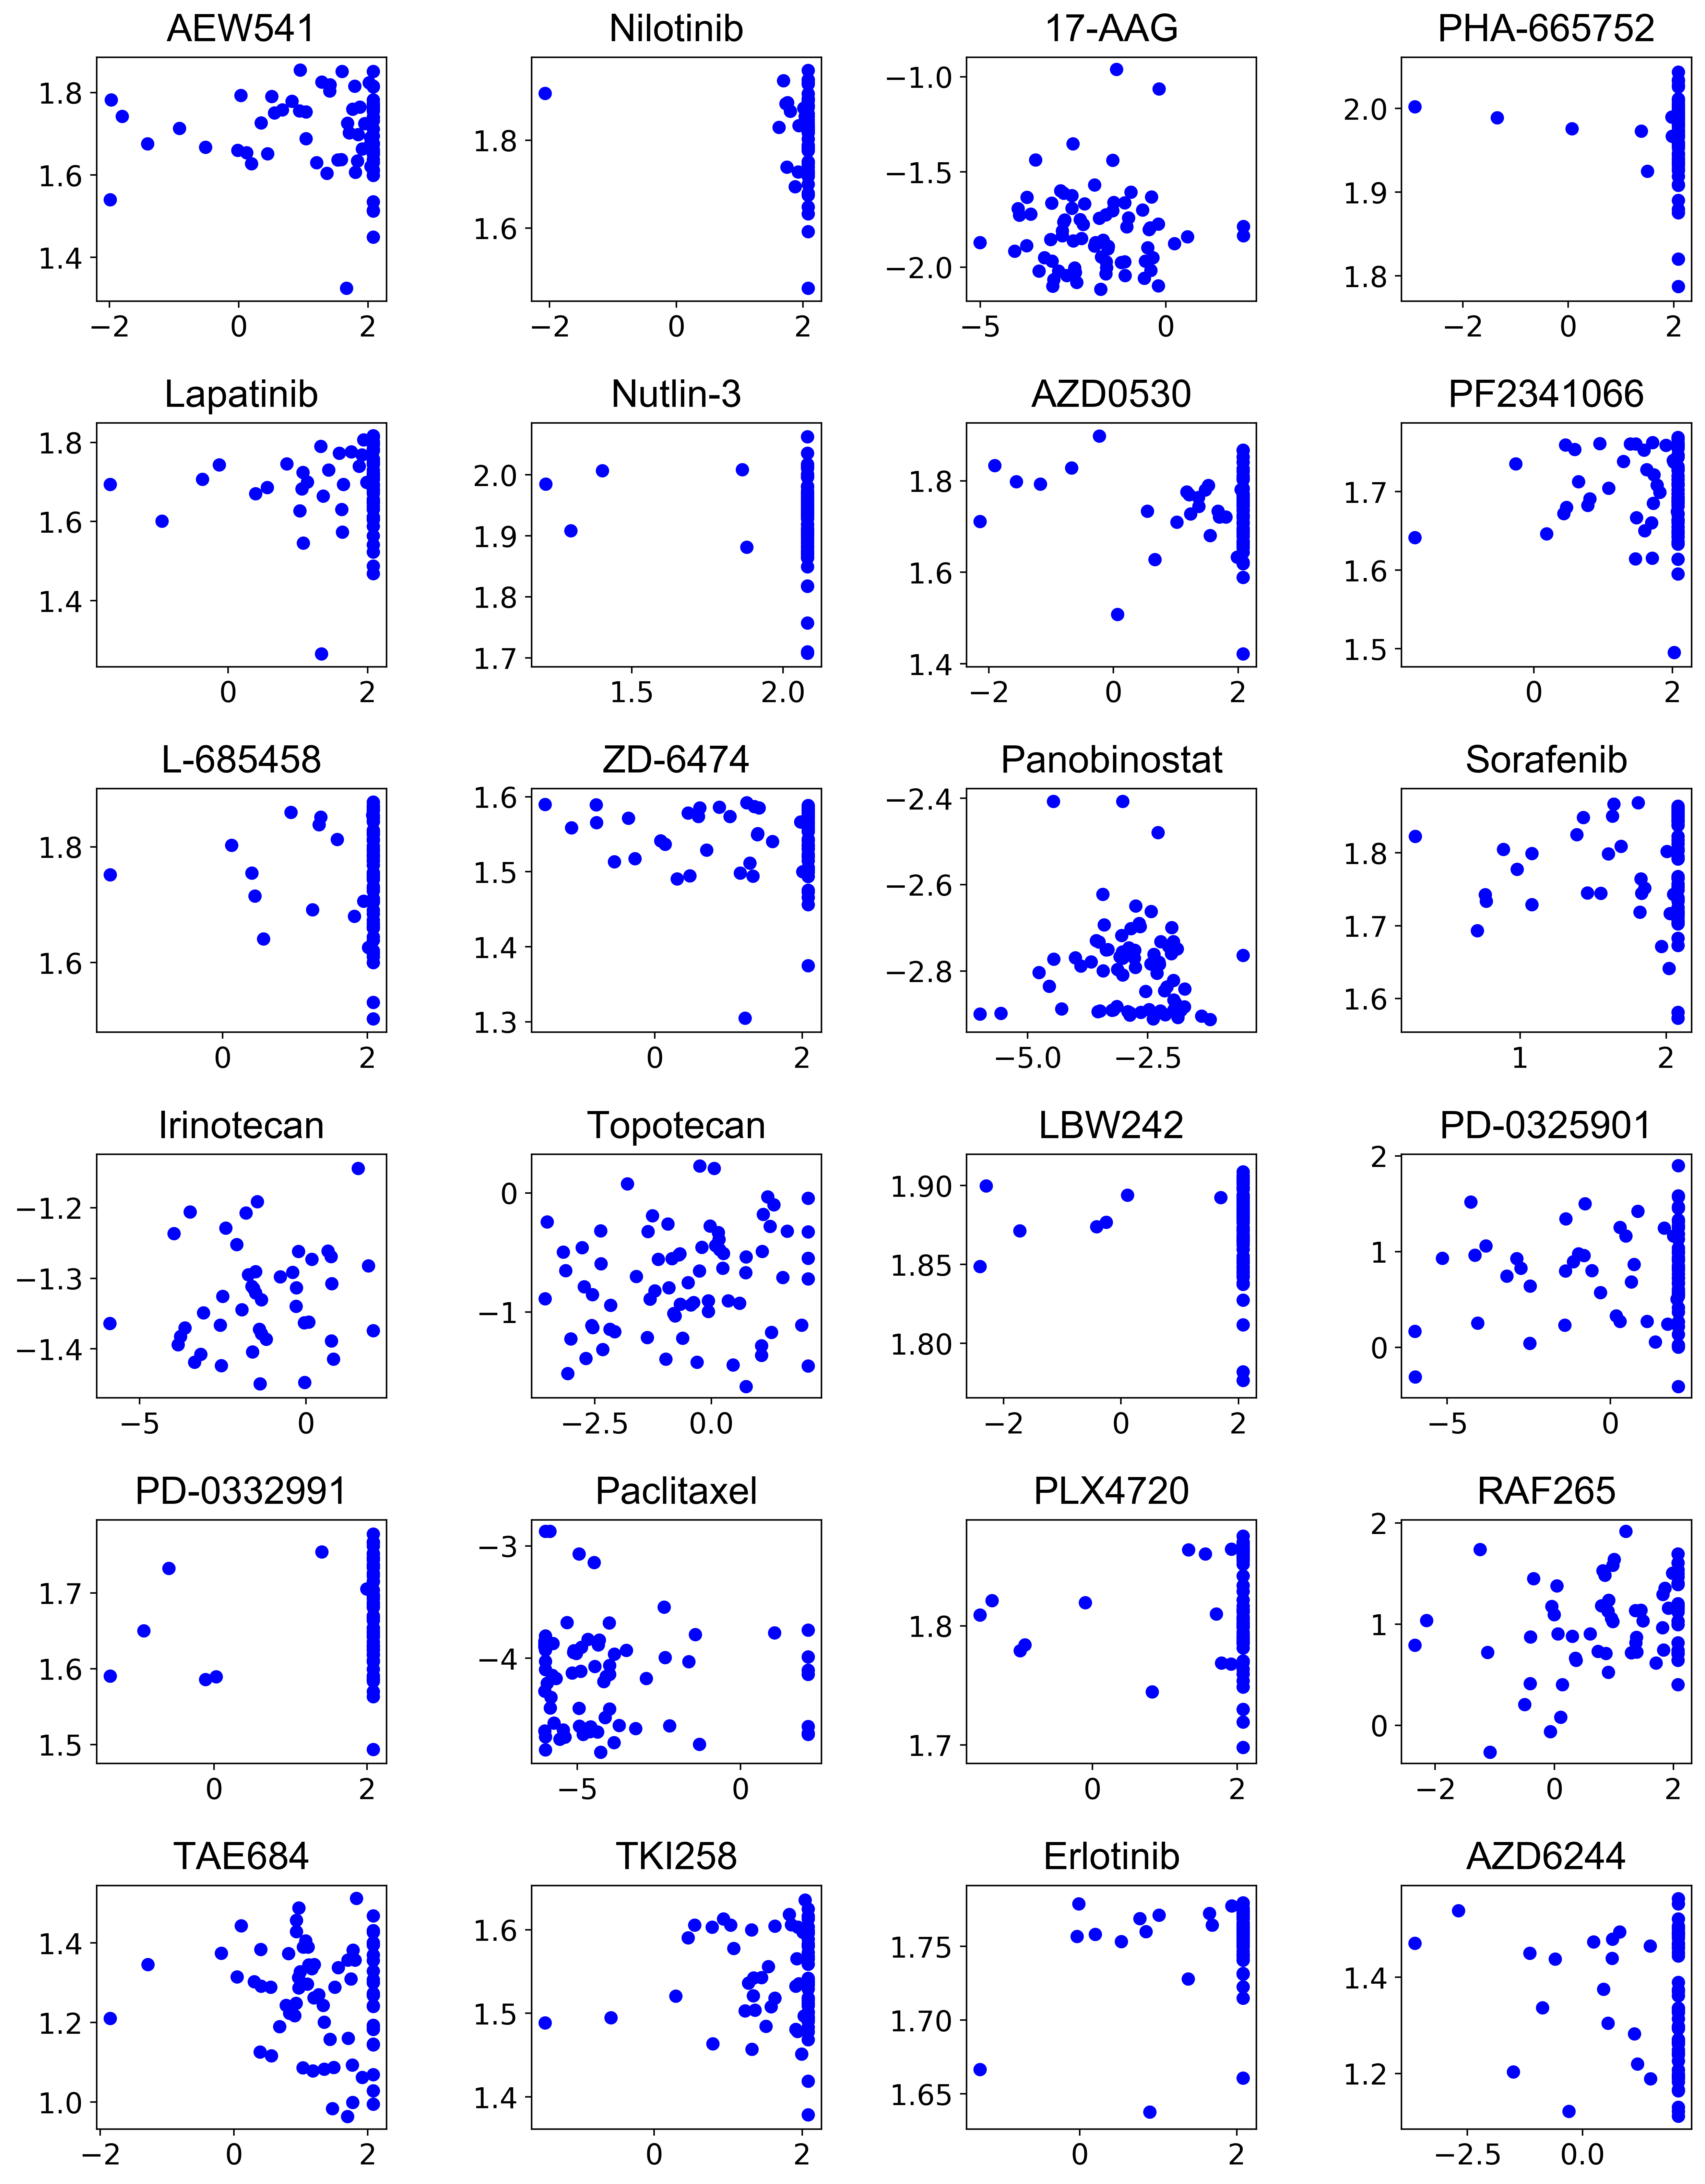

In [4]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(workdir + "//200914_MC9K_%s.npz" % dname)
    ss0 = np.load(workdir + '//200914_MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]
    
    # data reshape for CNN
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
    
    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model architecture
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    # In[10]:
    with K.tf.device('/GPU:0'):
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(inputs)
        maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
        conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
        maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
        flatten_cell_line = Flatten()(maxpool_cell_line_2)
        dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
        dropout_cell_line = Dropout(0.1)(dense_cell_line)

        dense_1 = Dense(300, activation='tanh')(dropout_cell_line)
        dropout_1 = Dropout(0.1)(dense_1)
        reshape_1 = Reshape((300, 1))(dropout_1)
        conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
        maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
        conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
        maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
        conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
        maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
        dropout_2 = Dropout(0.1)(maxpool_3)
        flatten = Flatten()(dropout_2)
        dropout_3 = Dropout(0.2)(flatten)

        predictions = Dense(1, activation='linear')(dropout_3)



        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=keras.optimizers.Adam(learning_rate),
                      metrics=['mse','mae'])
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    with K.tf.device('/GPU:0'):
        model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                            validation_data=(test_X, test_y))

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "E://Ronny_TF//200914_reupload//Result//scenario8_individual_approach//Table//CNN"
    c.to_csv(workdir + '//200915_scenario8_CNN_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='blue')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "E://Ronny_TF//200914_reupload//Dataset//scenario8_individual_model_approach"
workdir = "E://Ronny_TF//200914_reupload//Result//scenario8_individual_approach//Figure"

plt.savefig(workdir +'//200915_scenario8_CNN_plot.png', dpi=400)

In [5]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [6]:
result

,Drug,RMSE,R2value
0,AEW541,1.086172,-0.100202
1,Nilotinib,0.580387,-0.185207
2,17-AAG,1.335487,-0.020625
3,PHA-665752,0.734027,-0.020140
4,Lapatinib,0.729535,-0.004189
5,Nutlin-3,0.210300,-0.842569
6,AZD0530,0.986278,-0.041550
7,PF2341066,0.679550,-0.000938
8,L-685458,0.609107,-0.073110
9,ZD-6474,0.932852,-0.015650


In [7]:
workdir = "E://Ronny_TF//200914_reupload//Result//Scenario8_individual_approach"
result.to_csv(workdir +'//200915_scenario8_CNN_24drugs_metrics.csv', index=False)